In [23]:
# Import libraries
import numpy as np
from scipy.integrate import quad
import os
from julia import Julia
import matplotlib.pyplot as plt

In [16]:
# Run TRG Julia script for values of kbT
j = Julia(runtime='/Users/tomegg/.juliaup/bin/julia')
kbT_arr = np.linspace(1, 10, 50)
vals = []

# Iterate over kbT
for kbT in kbT_arr:

    # Run program
    j.include(f'2D-ising-TN.jl')
    result = j.main(kbT)
    print(result)
    vals.append(-result)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/julia/core.py:715: FutureWarning: Accessing `Julia().<name>` to obtain Julia objects is deprecated.  Use `from julia import Main; Main.<name>` or `jl = Julia(); jl.eval('<name>')`.
  warnings.warn(


2.0030558869096047
---------- Scale 1 -> 2  ----------

---------- Scale 2 -> 3  ----------

---------- Scale 3 -> 4  ----------

---------- Scale 4 -> 5  ----------

---------- Scale 5 -> 6  ----------

---------- Scale 6 -> 7  ----------

---------- Scale 7 -> 8  ----------
2.0030558869096047


---------- Scale 1 -> 2  ----------1.6936093204884897


---------- Scale 2 -> 3  ----------

---------- Scale 3 -> 4  ----------

---------- Scale 4 -> 5  ----------

---------- Scale 5 -> 6  ----------

---------- Scale 6 -> 7  ----------

---------- Scale 7 -> 8  ----------
1.6936093204884897
1.4686238956897437
---------- Scale 1 -> 2  ----------

---------- Scale 2 -> 3  ----------

---------- Scale 3 -> 4  ----------

---------- Scale 4 -> 5  ----------

---------- Scale 5 -> 6  ----------

---------- Scale 6 -> 7  ----------

---------- Scale 7 -> 8  ----------
1.4686238956897437

1.298996271493572
---------- Scale 1 -> 2  ----------


---------- Scale 2 -> 3  ----------

---------- Scale

In [34]:
# Analytial result for log(Z)
def logZ(beta):
    '''
    Function to compute log(Z) for 2D Ising model

    @param beta : Inverse temp
    @return logZ : result
    '''

    # Set k
    k = 1 / (np.sinh(2*beta) ** 2)
    logZ = (1 / 2) * np.log(2)

    # Set integrand
    def integrand(theta):
        return np.log((np.cosh(2*beta) ** 2) + (1 / k) * np.sqrt(1 + k ** 2 - 2 * k * np.cos(2*theta)))

    # Compute and return final result
    res, _ = quad(integrand, 0, np.pi)
    logZ += (1 / (2 * np.pi)) * res
    return -logZ

analytical = [logZ(beta) for beta in 1/kbT_arr]

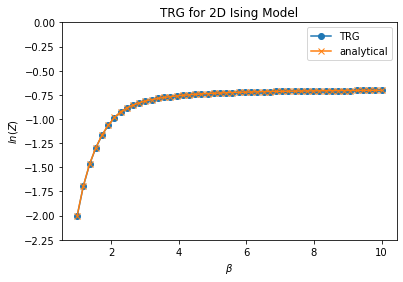

In [37]:
# Plot results
plt.title('TRG for 2D Ising Model')
plt.plot(kbT_arr, vals, marker='o', label='TRG')
plt.plot(kbT_arr, analytical, marker='x', label='analytical')
plt.legend()
plt.xlabel(r'$\beta$')
plt.ylabel(r'$ln(Z)$')
plt.ylim(-2.25, 0)
plt.show()